1. Read the dataset
2. EDA
3. Preprocessing
4. split into train and test
5. build the model
6. train the model
7. evaluate the model
8. use the model for predicting future data

## 1. Read the Dataset

In [11]:
import pandas as pd

data = pd.read_csv('Online_Transactions.csv', delimiter=';')

## 2. Exploratory Data Analysis

In [12]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      500 non-null    int64 
 1   month                   500 non-null    object
 2   bank_name               500 non-null    object
 3   no_of_transactions      500 non-null    int64 
 4   amt_of_transactions     500 non-null    object
 5   no_of_active_costumers  500 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 23.6+ KB
None
                 id  no_of_transactions  no_of_active_costumers
count    500.000000        5.000000e+02            5.000000e+02
mean   22219.500000        1.324790e+07            5.449187e+05
std      144.481833        9.733806e+07            5.541300e+06
min    21970.000000        3.000000e+00            1.000000e+00
25%    22094.750000        1.195500e+03            2.780000e+02
50%    22219.500000        6.514500e+03 

## 3. Preprocess the data

In [13]:
data['amt_of_transactions'] = data['amt_of_transactions'].str.replace(',', '').astype(float)
data['no_of_active_costumers'] = pd.to_numeric(data['no_of_active_costumers'], errors='coerce')
data = data.dropna()

X = data[['no_of_transactions', 'no_of_active_costumers']]
y_transactions = data['amt_of_transactions']
y_customers = data['no_of_active_costumers']

## 4. Spit into Train and Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train_transactions, y_test_transactions = train_test_split(X, y_transactions, test_size=0.2, random_state=42)
_, _, y_train_customers, y_test_customers = train_test_split(X, y_customers, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Build the model

In [15]:
from sklearn.ensemble import RandomForestRegressor

transaction_model = RandomForestRegressor(random_state=42)
transaction_model.fit(X_train_scaled, y_train_transactions)

customer_model = RandomForestRegressor(random_state=42)
customer_model.fit(X_train_scaled, y_train_customers)

RandomForestRegressor(random_state=42)

## 6. Train the models

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_transactions = transaction_model.predict(X_test_scaled)
y_pred_customers = customer_model.predict(X_test_scaled)

mse_transactions = mean_squared_error(y_test_transactions, y_pred_transactions)
r2_transactions = r2_score(y_test_transactions, y_pred_transactions) * 100

mse_customers = mean_squared_error(y_test_customers, y_pred_customers)
r2_customers = r2_score(y_test_customers, y_pred_customers) * 100

print(f'Transaction Model - MSE: {mse_transactions:.2f}, R²: {r2_transactions:.2f}%')
print(f'Customer Model - MSE: {mse_customers:.2f}, R²: {r2_customers:.2f}%')

Transaction Model - MSE: 926056464182843.50, R²: 81.28%
Customer Model - MSE: 42112861602.33, R²: 88.14%


## 7. Test and Evaluate Models

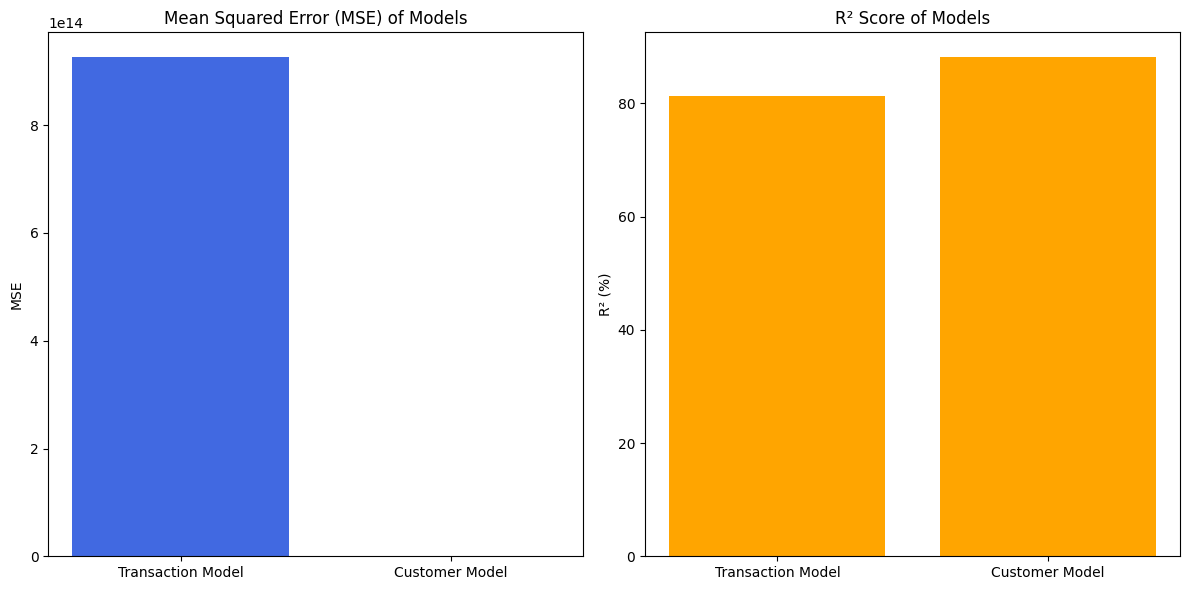

In [17]:
import matplotlib.pyplot as plt

model_names = ['Transaction Model', 'Customer Model']
mse_scores = [mse_transactions, mse_customers]
r2_scores = [r2_transactions, r2_customers]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, mse_scores, color='royalblue')
plt.title('Mean Squared Error (MSE) of Models')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color='orange')
plt.title('R² Score of Models')
plt.ylabel('R² (%)')

plt.tight_layout()
plt.show()

## 8. Use the Model for Predicting the future data

In [18]:
def predict_by_bank_name(bank_name):
    bank_data = data[data['bank_name'] == bank_name]
    if bank_data.empty:
        return f"No data found for bank name: {bank_name}"

    no_of_transactions = bank_data['no_of_transactions'].values[0]
    no_of_active_customers = bank_data['no_of_active_costumers'].values[0]
    input_data = pd.DataFrame({
        'no_of_transactions': [no_of_transactions],
        'no_of_active_costumers': [no_of_active_customers]
    })
    input_scaled = scaler.transform(input_data)

    predicted_transactions = transaction_model.predict(input_scaled)[0]
    predicted_customers = customer_model.predict(input_scaled)[0]

    return {
        'Bank Name': bank_name,
        'Predicted Transaction Amount for Next Month': predicted_transactions,
        'Predicted Number of Active Customers for Next Month': int(predicted_customers)
    }

bank_name = input("Enter the bank name: ")

results = predict_by_bank_name(bank_name)

if isinstance(results, dict):
    print(f"Bank: {results['Bank Name']}")
    print(f"Predicted Transaction Amount for Next Month: ₹{results['Predicted Transaction Amount for Next Month']:,.2f}")
    print(f"Predicted Number of Active Customers for Next Month: {results['Predicted Number of Active Customers for Next Month']}")
else:
    print(results)

Bank: The Babasaheb Deshmukh Sahakari Bank Ltd Atpadi
Predicted Transaction Amount for Next Month: ₹2,174.46
Predicted Number of Active Customers for Next Month: 22
